<a href="https://colab.research.google.com/github/Peksyaji/Orbit-AI-Mastery/blob/main/IPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Peksyaji/Orbit-AI-Mastery/main/datasets/IPM.csv')
df.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [4]:
df.duplicated().sum()

0

#EDA&Visualisasi

In [5]:
print(set(df['IPM']))

{'Normal', 'High', 'Low', 'Very-High'}


BPS mengelompokkan kategori IPM menjadi:
- IPM < 60 : Low
- 60 ≤ IPM < 70 : Normal
- 70 ≤ IPM < 80 : High
- IPM ≥ 80 : Very High

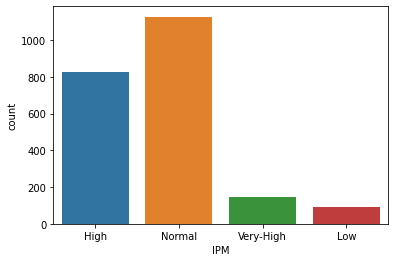

In [6]:
sns.countplot(data=df, x='IPM')
plt.show()

In [7]:
df['IPM'].value_counts()

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

Dari output penghitungan jumlah tiap kategori pada variabel 'IPM' di atas, diketahui bahwa kategori Normal sangat mendominasi dengan presentase sekitar 51.37% dan kategori Very High dan Low adalah 2 kategori dengan jumlah terendah.

In [8]:
df.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


In [9]:
df[df['IPM']=='High'].describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,829.000000,829.000000,829.000000,829.000000
mean,13.394692,11623.250905,9.086417,71.308384
std,0.837822,1432.000579,1.069146,2.200747
min,11.490000,8188.000000,6.980000,64.570000
25%,12.810000,10638.000000,8.280000,69.920000
50%,13.230000,11486.000000,8.950000,71.170000
75%,13.890000,12367.000000,9.900000,72.550000
max,16.410000,18121.000000,11.710000,77.730000


In [10]:
df[df['IPM']=='Low'].describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,93.000000,93.000000,93.000000,93.000000
mean,9.549892,5389.580645,4.403441,63.531075
std,2.549142,861.622866,1.635205,3.427240
min,2.950000,3975.000000,0.850000,54.820000
25%,7.660000,4826.000000,3.040000,60.230000
50%,9.810000,5282.000000,4.570000,65.170000
75%,11.720000,5633.000000,5.650000,65.740000
max,13.470000,8198.000000,7.440000,67.620000


In [11]:
# Harapan lama sekolah di bawah 12 tahun
df[df['Harapan_Lama_Sekolah']<12].shape

(288, 5)

Terdapat 288 entry dengan Harapan Lama Sekolah di bawah 12 tahun

In [12]:
# Rata-rata lama sekolah di atas 12 tahun
df[df['Rerata_Lama_Sekolah']>=12].shape

(7, 5)

Meskipun hanya terdapat 288 entry yang memiliki angka Harapan Lama Sekolah di bawah 12 tahun, tetapi pada variabel Rerata Lama Sekolah hanya ada 7 entry yang memiliki rata-rata lama waktu bersekolahnya minimal 12 tahun.

In [13]:
# Angka Harapan Hidup dibawah publikasi BPS
df[df['Usia_Harapan_Hidup']<72.71].shape

(1832, 5)

Menurut BPS, rata-rata Angka Harapan Hidup masyarakat Indonesia pada tahun 2022 adalah 72.71 tahun, tetapi dari data yang diberikan, rata-rata Angka Harapan Hidup hanya 69.47 tahun dan terdapat 1832 entry yang memiliki Angka Harapan Hidup di bawah publikasi BPS.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


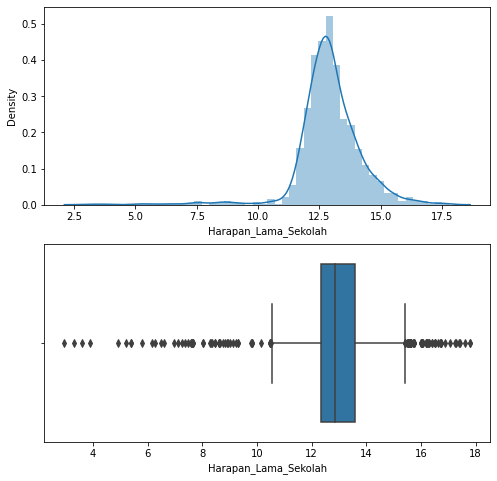

In [14]:
# Distribusi Harapan Lama Sekolah
f = plt.figure(figsize=(8,8))
f.add_subplot(2,1,1)
sns.distplot(df['Harapan_Lama_Sekolah'])
f.add_subplot(2,1,2)
sns.boxplot(df['Harapan_Lama_Sekolah'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


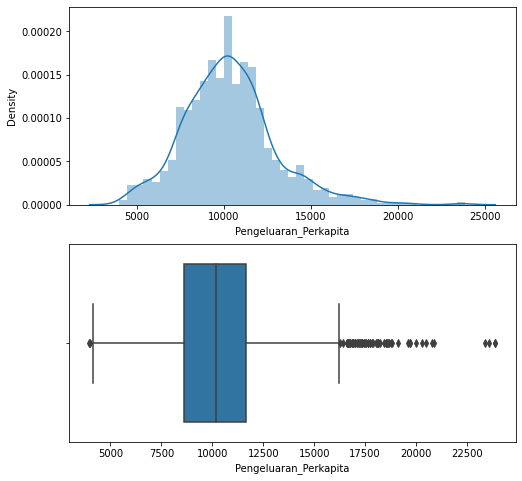

In [15]:
# Distribusi Pengeluaran Perkapita
f = plt.figure(figsize=(8,8))
f.add_subplot(2,1,1)
sns.distplot(df['Pengeluaran_Perkapita'])
f.add_subplot(2,1,2)
sns.boxplot(df['Pengeluaran_Perkapita'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


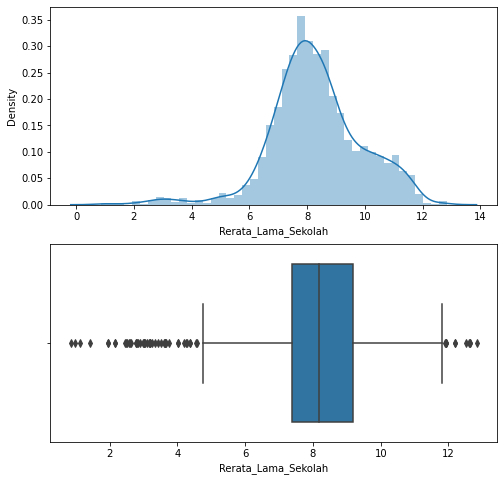

In [16]:
# Distribusi Rerata Lama Sekolah
f = plt.figure(figsize=(8,8))
f.add_subplot(2,1,1)
sns.distplot(df['Rerata_Lama_Sekolah'])
f.add_subplot(2,1,2)
sns.boxplot(df['Rerata_Lama_Sekolah'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


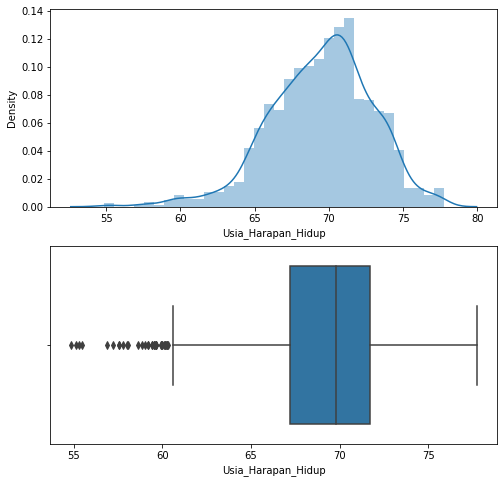

In [17]:
# Distribusi Usia Harapan Hidup
f = plt.figure(figsize=(8,8))
f.add_subplot(2,1,1)
sns.distplot(df['Usia_Harapan_Hidup'])
f.add_subplot(2,1,2)
sns.boxplot(df['Usia_Harapan_Hidup'])
plt.show()

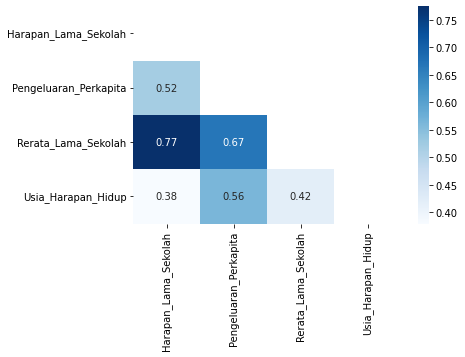

In [18]:
# Cek korelasi
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Blues", annot=True)
plt.show()

# Scaling

Karena data memiliki banyak outlier, akan dilakukan sclaing dengan metode Robust Scaler

In [19]:
scaler = RobustScaler()
scaler.fit(df.iloc[:,:-1])
df_scaler = scaler.transform(df.iloc[:,:-1])
df_scaler = pd.DataFrame(df_scaler, columns=df.iloc[:,:-1].columns)
df_scaler.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,1.229508,-0.202068,0.664804,0.038867
1,0.852459,-0.991452,0.726257,-1.000555
2,1.196721,-0.461288,0.279330,-0.523043
3,1.426230,-0.655377,0.391061,-1.196002
4,0.942623,-0.704225,0.832402,-0.347585


# Encoding

In [20]:
enc = OrdinalEncoder()
df['code_IPM'] = enc.fit_transform(df[['IPM']])

- High : 0.0
- Very-High : 1.0
- Normal : 2.0
- Low : 3.0

In [21]:
df_scaler.insert(4, 'code_IPM', df['code_IPM'])
df_scaler.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,code_IPM
0,1.229508,-0.202068,0.664804,0.038867,0.0
1,0.852459,-0.991452,0.726257,-1.000555,2.0
2,1.196721,-0.461288,0.279330,-0.523043,2.0
3,1.426230,-0.655377,0.391061,-1.196002,2.0
4,0.942623,-0.704225,0.832402,-0.347585,2.0


# Modelling

In [22]:
X = df_scaler.iloc[:,:-1]
y = df_scaler.iloc[:,-1]

In [23]:
# Membagi dataset menjadi data training dan testing dengan proporsi 4:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((1756, 4), (440, 4))

## Random Forest

In [24]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = classifier_rf.predict(X_test)

### Evaluasi

In [26]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[159,   0,   3,   2],
       [  0,  15,   1,   0],
       [  5,   0, 222,   0],
       [  1,   0,   0,  32]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       164
         1.0       1.00      0.94      0.97        16
         2.0       0.98      0.98      0.98       227
         3.0       0.94      0.97      0.96        33

    accuracy                           0.97       440
   macro avg       0.97      0.96      0.97       440
weighted avg       0.97      0.97      0.97       440



In [28]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', classifier_rf.score(X_train, y_train))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', classifier_rf.score(X_test, y_test))

Skor akurasi data latih: 1.0
Skor akurasi data uji: 0.9727272727272728


### Balancing

In [29]:
SMOTE = SMOTE()
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [30]:
classifier_rf2 = RandomForestClassifier()
classifier_rf2.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

In [31]:
y_pred = classifier_rf2.predict(X_test)

### Evaluasi

In [32]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[157,   0,   4,   3],
       [  0,  16,   0,   0],
       [  2,   2, 223,   0],
       [  1,   0,   0,  32]])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       164
         1.0       0.89      1.00      0.94        16
         2.0       0.98      0.98      0.98       227
         3.0       0.91      0.97      0.94        33

    accuracy                           0.97       440
   macro avg       0.94      0.98      0.96       440
weighted avg       0.97      0.97      0.97       440



In [34]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', classifier_rf2.score(X_train_SMOTE, y_train_SMOTE))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', classifier_rf2.score(X_test, y_test))

Skor akurasi data latih: 0.9997225305216426
Skor akurasi data uji: 0.9727272727272728


## AdaBoost

In [35]:
ABclassifier = AdaBoostClassifier()

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)

In [36]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred_AB)
cm

array([[127,   0,  37,   0],
       [  0,  16,   0,   0],
       [ 35,  15, 177,   0],
       [ 33,   0,   0,   0]])

In [37]:
print(classification_report(y_test, y_pred_AB))

              precision    recall  f1-score   support

         0.0       0.65      0.77      0.71       164
         1.0       0.52      1.00      0.68        16
         2.0       0.83      0.78      0.80       227
         3.0       0.00      0.00      0.00        33

    accuracy                           0.73       440
   macro avg       0.50      0.64      0.55       440
weighted avg       0.69      0.73      0.70       440



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', ABclassifier.score(X_train, y_train))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', ABclassifier.score(X_test, y_test))

Skor akurasi data latih: 0.7539863325740319
Skor akurasi data uji: 0.7272727272727273


In [39]:
ABclassifier = AdaBoostClassifier()

ABclassifier.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_AB = ABclassifier.predict(X_test)

In [40]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred_AB)
cm

array([[ 19, 140,   0,   5],
       [  0,  16,   0,   0],
       [  0, 227,   0,   0],
       [ 22,   0,   0,  11]])

In [41]:
print(classification_report(y_test, y_pred_AB))

              precision    recall  f1-score   support

         0.0       0.46      0.12      0.19       164
         1.0       0.04      1.00      0.08        16
         2.0       0.00      0.00      0.00       227
         3.0       0.69      0.33      0.45        33

    accuracy                           0.10       440
   macro avg       0.30      0.36      0.18       440
weighted avg       0.23      0.10      0.11       440



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Setelah Balancing

In [42]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', ABclassifier.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', ABclassifier.score(X_test, y_test))

Skor akurasi data latih: 0.39844617092119866
Skor akurasi data uji: 0.10454545454545454


## KNN

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [44]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[153,   0,   6,   5],
       [  0,  15,   1,   0],
       [  6,   0, 221,   0],
       [  0,   0,   0,  33]])

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       164
         1.0       1.00      0.94      0.97        16
         2.0       0.97      0.97      0.97       227
         3.0       0.87      1.00      0.93        33

    accuracy                           0.96       440
   macro avg       0.95      0.96      0.95       440
weighted avg       0.96      0.96      0.96       440



In [46]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', classifier_rf.score(X_train, y_train))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', classifier_rf.score(X_test, y_test))

Skor akurasi data latih: 1.0
Skor akurasi data uji: 0.9727272727272728


### Setelah Balancing

In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = knn.predict(X_test)

In [48]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[152,   0,   4,   8],
       [  0,  16,   0,   0],
       [  6,   1, 220,   0],
       [  0,   0,   0,  33]])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       164
         1.0       0.94      1.00      0.97        16
         2.0       0.98      0.97      0.98       227
         3.0       0.80      1.00      0.89        33

    accuracy                           0.96       440
   macro avg       0.92      0.97      0.95       440
weighted avg       0.96      0.96      0.96       440



In [50]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', classifier_rf.score(X_train_SMOTE, y_train_SMOTE))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', classifier_rf.score(X_test, y_test))

Skor akurasi data latih: 0.9902885682574917
Skor akurasi data uji: 0.9727272727272728


# Kesimpulan
- Masih terdapat 13.11% data yang memiliki Harapan Lama Sekolah di bawah 12 tahun
- Hanya ada 0.3% data yang memiliki rata-rata bersekolah di atas 12 tahun
- 83.42% data memiliki usia harapan hidup di bawah rata-rata yang dipublikasikan BPS
- Data banyak memiliki outlier
- Model terbaik yang telah dibangun adalah Random Forest dengan proses balancing data metode smote
# Rekomendasi
- Random Forest dapat digunakan untuk klasifikasi Indeks Pembangunan Manusia dengan akurasi tinggi
- Langkah yang dapat diambil pemerintah untuk meningkatkan IPM:
  - Memberikan beasiswa dan motivasi pendidikan
  - Memberikan stimulus ekonomi dan bantuan sosial
  - Meningkatkan jaminan sosial kesehatan dan peningkatan faskes